In [2]:
library(sqldf)
library(tidyverse)
library(lubridate)
library(forecast)
library(forecast)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [3]:
airq<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/H_Mar_PM10_2561.csv")

In [4]:
airq2<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/H_PM10_Apr_2561.csv")

In [14]:
sensorlist<-sqldf('select distinct(sensorid) from airq')

In [20]:
sensorlist<-as.vector(sensorlist$sensorid)

In [5]:
hourly<-rbind(airq,airq2)

In [26]:
hourly[hourly$sensorid=="CU-SOO94",1]<-"CU-S0094"

In [6]:
hourly$date<-as.Date(hourly$date,format="%Y-%m-%d")

In [27]:
hourly$timepos <- as.POSIXct(strptime(paste(hourly$date,hourly$h), "%Y-%m-%d %H"))

In [29]:
datefull<-seq(from=min(hourly$timepos),to=max(hourly$timepos), by="hour")
sensor_newhour<-sqldf('select distinct(sensorid) from hourly')
fulldata<-merge(sensor_newhour,datefull)
colnames(fulldata)[2]<-'timepos'
newhour<-sqldf('select f.sensorid,f.timepos,n.pm10 from fulldata f LEFT JOIN hourly n ON f.sensorid = n.sensorid AND f.timepos=n.timepos')

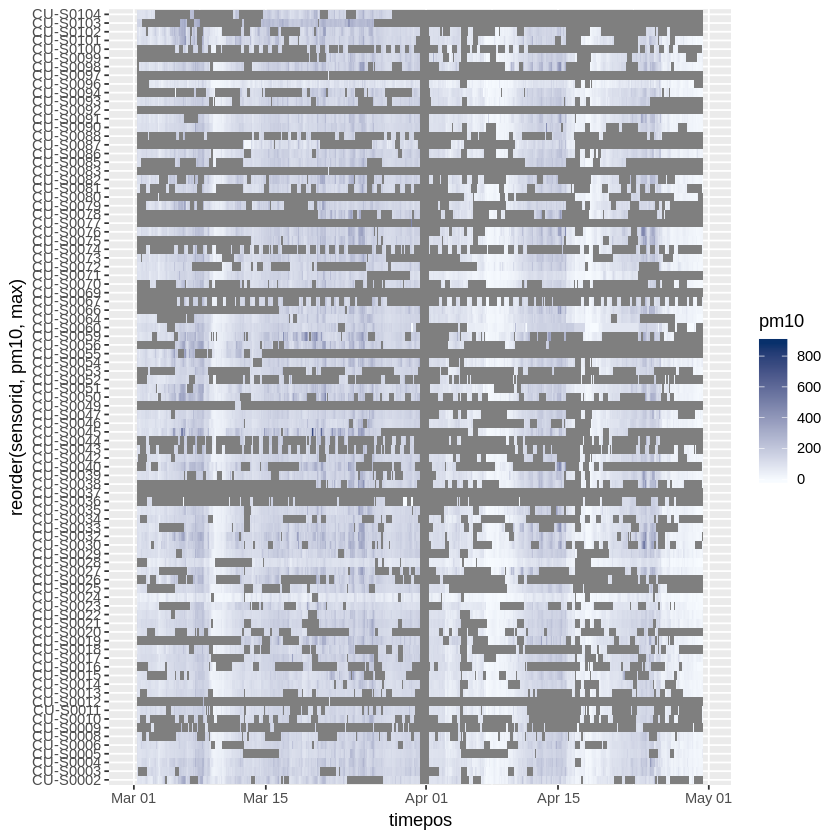

In [33]:
library(RColorBrewer)
colorsetting=brewer.pal(9,"Blues")
ggplot(data=newhour, aes(x=timepos, y=reorder(sensorid,pm10,mean))) + geom_tile(aes(fill=pm10)) + scale_fill_gradient(low=colorsetting[1],high=colorsetting[9])

In [11]:
onesen = sqldf("select * from hourly where sensorid='CU-S0035'")

In [12]:
trend_pm10 = ma(as.ts(onesen$pm10), order = 24, centre = T)

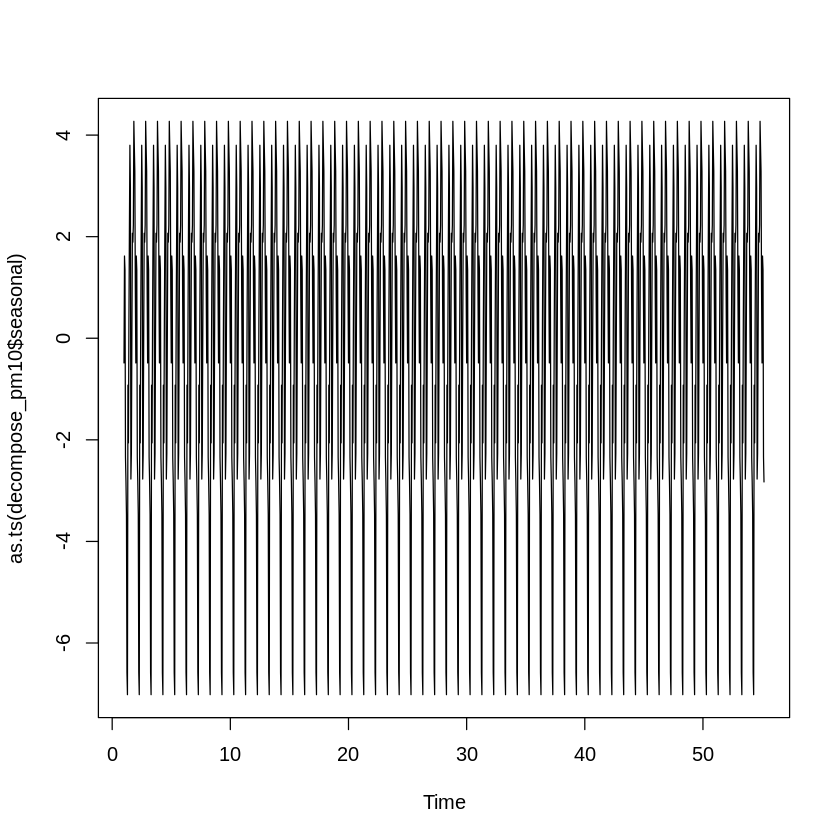

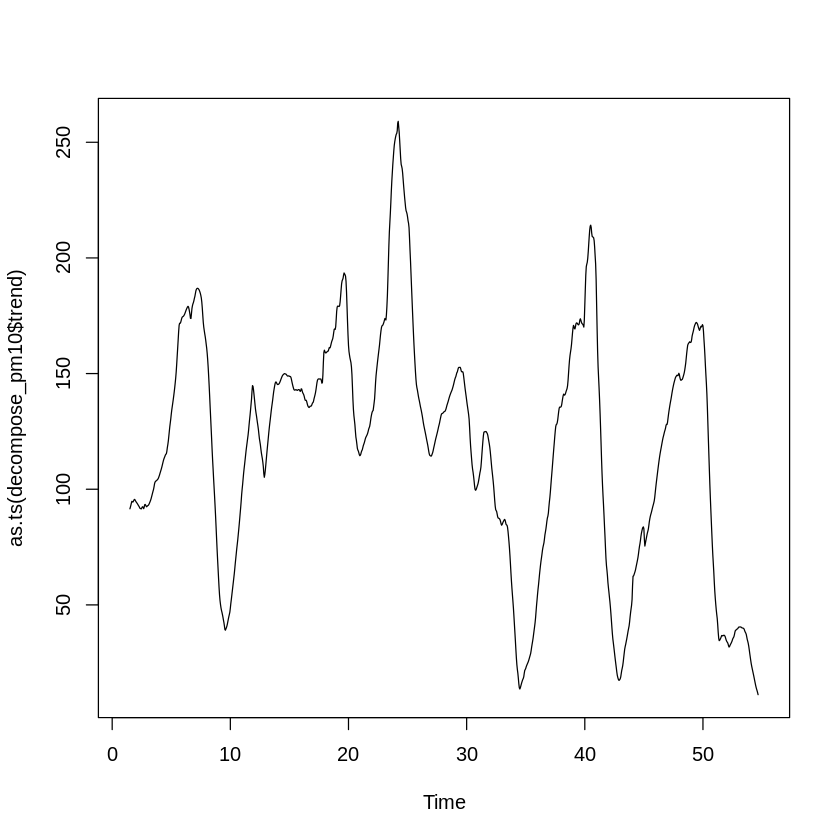

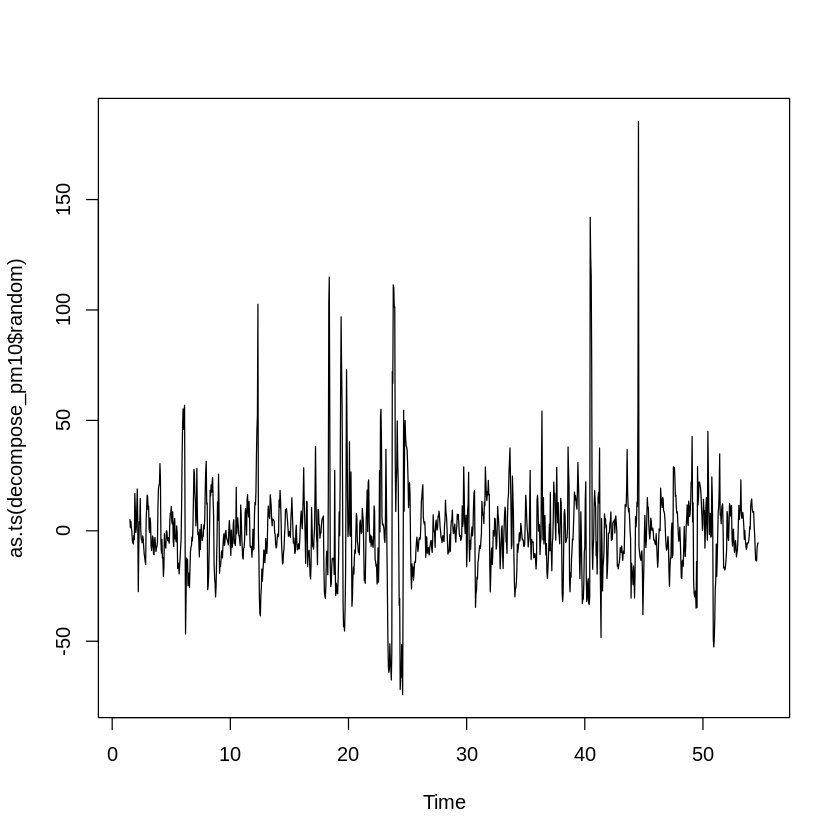

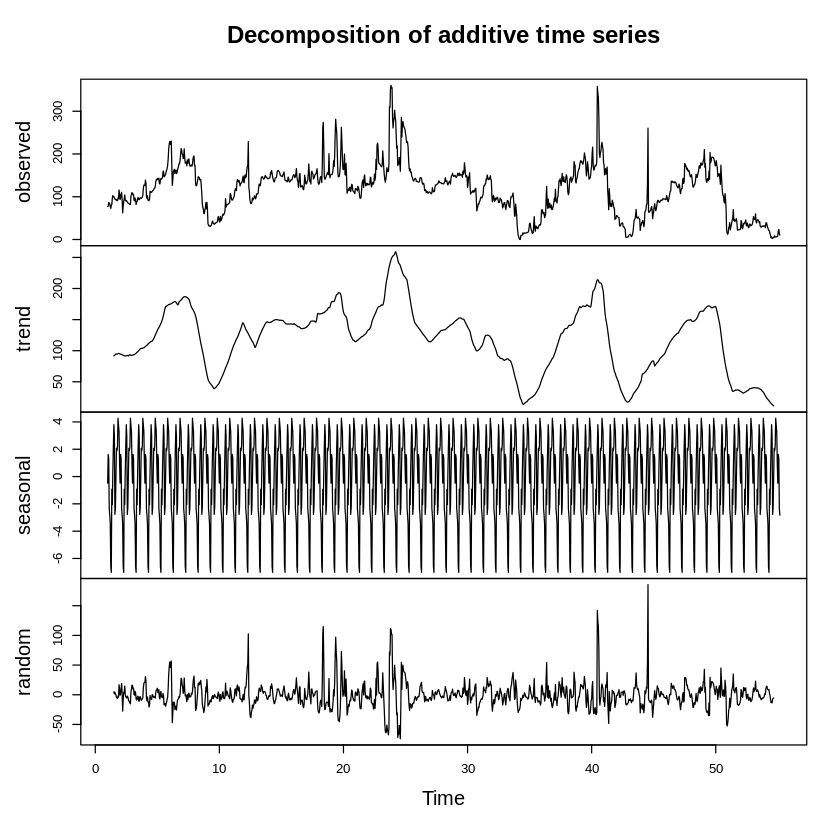

In [13]:
ts_hourly = ts(onesen$pm10, frequency = 24)
decompose_pm10 = decompose(ts_hourly, "additive")
 
plot(as.ts(decompose_pm10$seasonal))
plot(as.ts(decompose_pm10$trend))
plot(as.ts(decompose_pm10$random))
plot(decompose_pm10)